# E91 Implementation

1. create bell pairs
2. choose measurement for alice, bob
    * rotate $|0\rangle$, $|1\rangle$ by $a \in \{0,\frac{\pi}{4},\frac{\pi}{2}\}$ or $b \in \{\frac{\pi}{4},\frac{\pi}{2},\frac{3\pi}{4}\}$

Source: [https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.67.661](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.67.661)

In [1]:
import qiskit
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram
from numpy.random import randint#, choice
import numpy as np
print("Imports Successful")

Imports Successful


In [2]:
msg_len = 10

In [3]:
# help(qiskit.circuit.library.U1Gate)

In [48]:
def alice_measure(qc):
    chosen_bases = []
    for i in range(msg_len):
        alice_q = 2*i
        base = randint(3)
        chosen_bases.append(base+1)
        rot = np.pi * base / 4
        qc.h(alice_q)
        qc.u1(-rot, alice_q)
        qc.measure(alice_q, alice_q)
    return chosen_bases

def bob_measure(qc):
    chosen_bases = []
    for i in range(msg_len):
        bob_q = 2*i + 1
        base = randint(1,4)
        chosen_bases.append(base)
        rot = np.pi * base / 4
        qc.h(bob_q)
        qc.u1(-rot, bob_q)
        qc.measure(bob_q, bob_q)
    return chosen_bases

# Prepare Bell States
def prepare_bell_state():
    qc = QuantumCircuit(2*msg_len, 2*msg_len)
    for i in range(msg_len):
        q1 = 2*i
        q2 = 2*i + 1
        qc.x(q1)
        qc.x(q2)
        qc.h(q1)
        qc.cx(q1,q2)
    qc.barrier()
    return qc

In [49]:
qc = prepare_bell_state()
qc.draw()

┌───┐┌───┐      ░ 
 q_0: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
 q_1: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
 q_2: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
 q_3: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
 q_4: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
 q_5: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
 q_6: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
 q_7: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
 q_8: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
 q_9: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
q_10: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
q_11: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
q_12: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
q_13: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
q_14: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
q_15: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
q_16: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
q_17: ┤ X ├─────┤ X ├─░─
      ├───┤┌───┐└───┘ ░ 
q_18: ┤ X ├┤ H ├──■───░─
      ├───┤└───┘┌─┴─┐ ░ 
q_19: ┤ X ├─────┤ X ├─░─
      └───┘     └───┘ ░ 
 c_0: ══════════════════
                        
 c_1: ══════════════════
                        
 c_2: ══════════════════
                        
 c_3: ══════════════════
                        
 c_4: ══════════════════
                        
 c_5: ══════════════════
                        
 c_6: ══════════════════
                        
 c_7: ══════════════════
                        
 c_8: ══════════════════
                        
 c_9: ══════════════════
                        
c_10: ══════════════════
                        
c_11: ══════════════════
                        
c_12: ══════════════════
                        
c_13: ══════════════════
                        
c_14: ══════════════════
                        
c_15: ══════════════════
                        
c_16: ══════════════════
                        
c_17: ══════════════════
                        
c_18: ══════════════════
                        
c_19: ══════════════════

In [50]:
# add measurements with random bases
a_bases = alice_measure(qc)
b_bases = bob_measure(qc)
#qc.draw()

In [51]:
qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc, shots=1, memory=True)
result = qasm_sim.run(qobj).result()
# get_counts returns a dict, with the classical register as the *key* 
# which feels silly. this ugly idiom retrieves that key. surely a 
# better way to do this
measurements = [k for k in result.get_counts()][0]

In [52]:
for idx, (a_b, b_b) in enumerate(zip(a_bases, b_bases)):
    if((a_b == 2 and b_b == 1) or (a_b == 3 and b_b == 2)):
        a_m = measurements[2*idx]
        b_m = measurements[2*idx + 1]
        print("match! idx {}, Alice measured {} and Bob measured {}".format(idx, a_m, b_m))

match! idx 8, Alice measured 1 and Bob measured 0


In [53]:
measurements

'01011010011010101010'

In [54]:
for i in range(10):
    print("Run {}".format(i))
    # Prepare Bell States
    qc = prepare_bell_state()
    # add measurements with random bases
    a_bases = alice_measure(qc)
    b_bases = bob_measure(qc)
    qobj = assemble(qc, shots=1, memory=True)
    result = qasm_sim.run(qobj).result()
    # get_counts returns a dict, with the classical register as the *key* 
    # which feels silly. this ugly idiom retrieves that key. surely a 
    # better way to do this
    measurements = [k for k in result.get_counts()][0]
    for idx, (a_b, b_b) in enumerate(zip(a_bases, b_bases)):
        if((a_b == 2 and b_b == 1) or (a_b == 3 and b_b == 2)):
            a_m = measurements[2*idx]
            b_m = measurements[2*idx + 1]
            if((int(a_m) + int(b_m)) == 1):
                print("good match!")
            else:
                print("bad match. idx {}, a_b {}, a_m {}, b_b {}, b_m {}".format(idx, a_b, a_m, b_b, b_m))

Run 0
good match!
good match!
Run 1
good match!
Run 2
good match!
good match!
good match!
good match!
Run 3
good match!
good match!
Run 4
good match!
good match!
Run 5
good match!
good match!
good match!
Run 6
good match!
good match!
good match!
Run 7
good match!
good match!
Run 8
good match!
good match!
Run 9
good match!
good match!


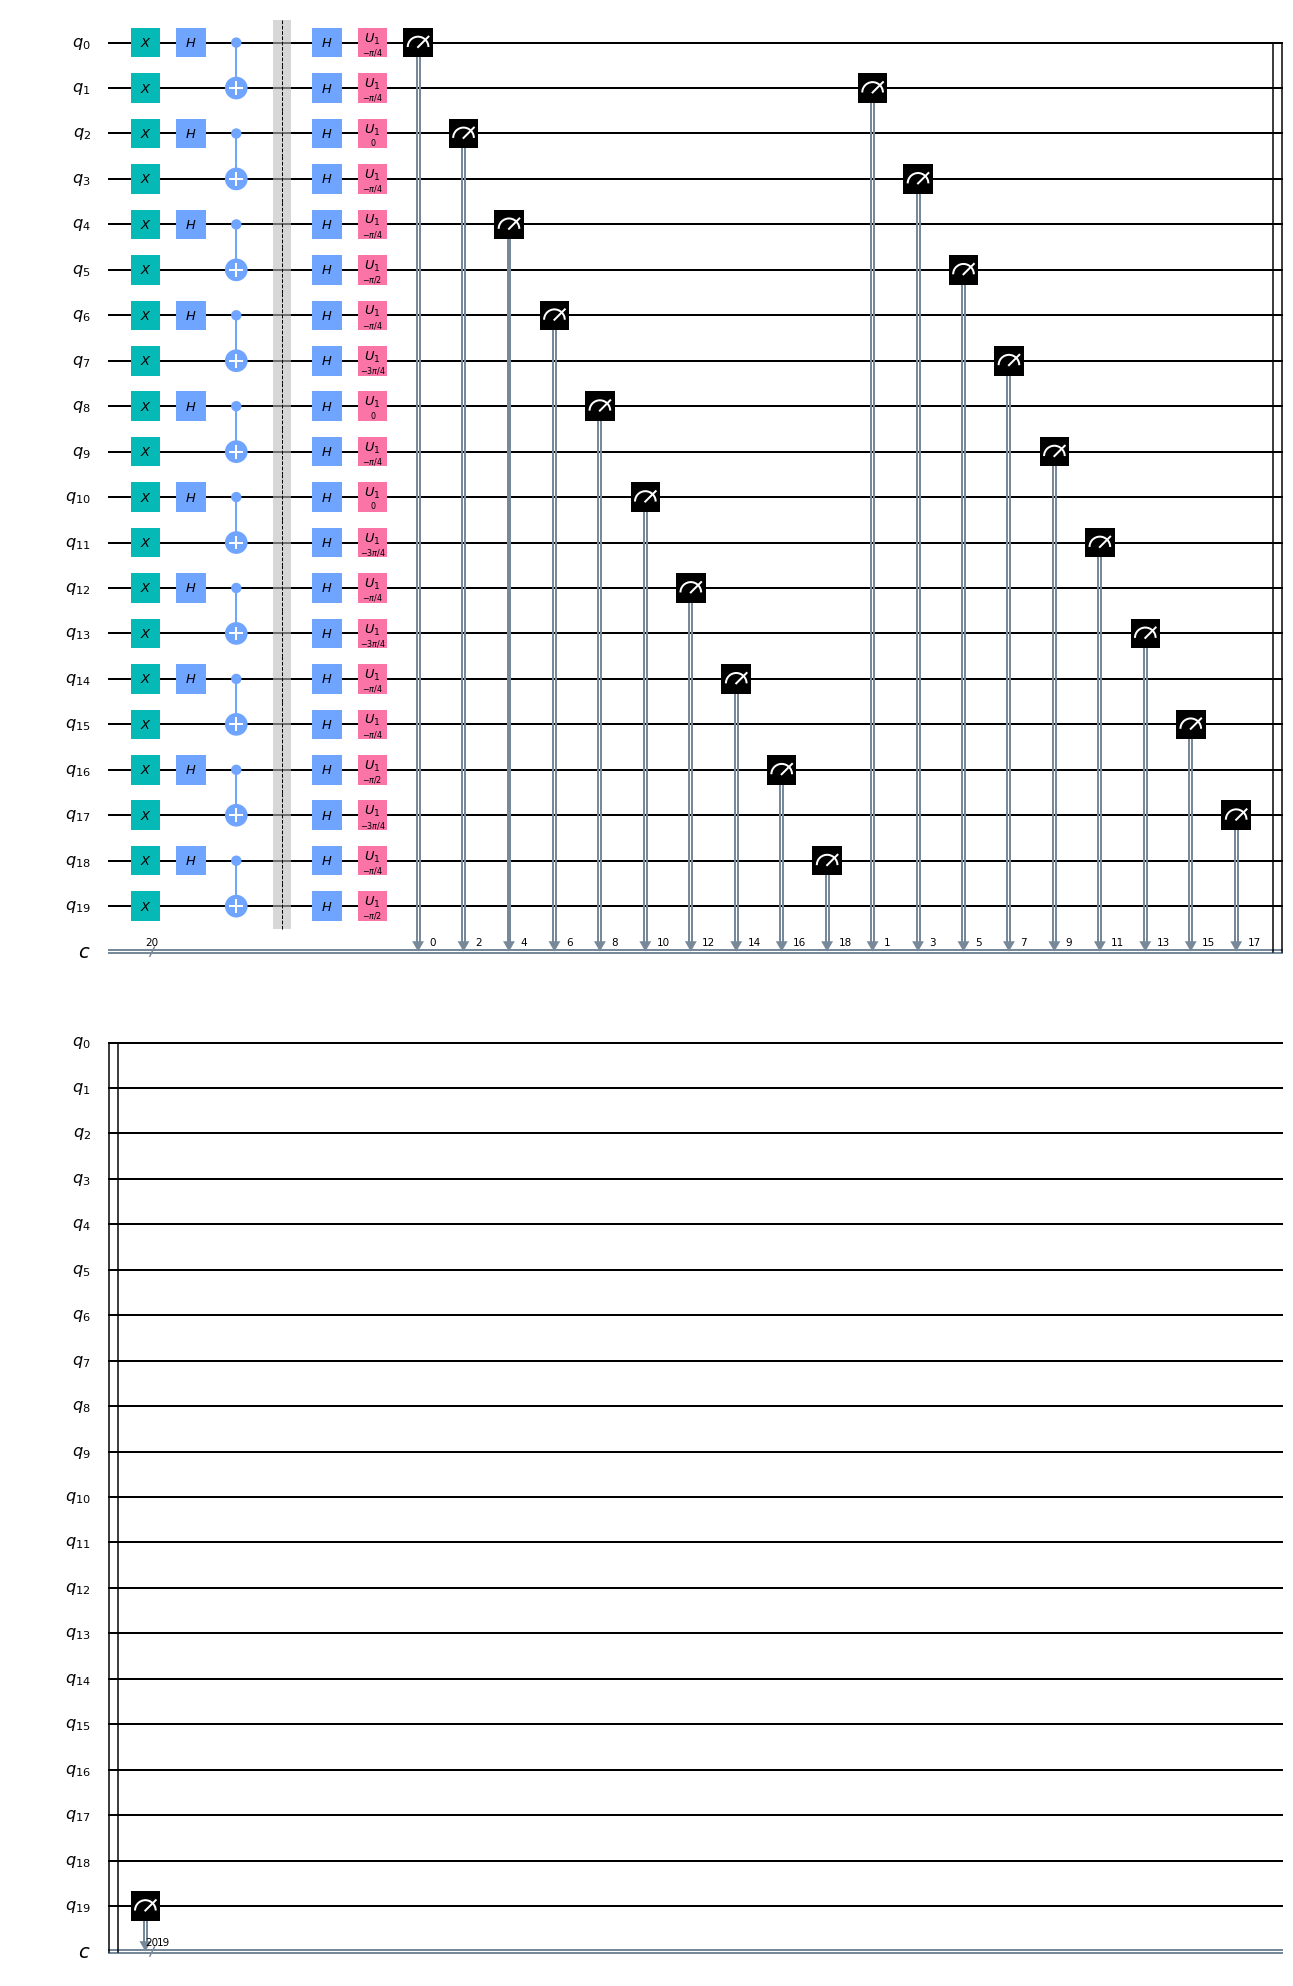

In [55]:
qc.draw(output='mpl')

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table